<a href="https://colab.research.google.com/github/mpatrini7/DataLAB42/blob/main/Week2/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Part 1***

In [2]:
import numpy as np

**1.Create an array of ten zeros**

In [3]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**2.Create an array of ten ones**

In [4]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**3.Create an array of integers from 10 to 50**

In [5]:
np.arange(10, 51, 1)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50])

**4.Create array of all the even integers from 10 to 50**

In [6]:
np.arange(10, 51, 2)


array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50])

**5.Create a 3x3 identity matrix**

In [7]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

**6.Generate a random number between 0 and 1**

In [8]:
np.random.random()

0.8584665140613653

***7.Create the following matrix:***

In [9]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

# ***Part 2***

In [10]:
import matplotlib.pyplot as plt

**1.Create a matrix of random values of distribution of your choice**

In [11]:
np.random.rand(3, 3)

array([[0.69066385, 0.60973445, 0.26119246],
       [0.02299399, 0.49157053, 0.59619599],
       [0.51021144, 0.98466321, 0.59941624]])

**2.Create a 1-dimensional array of 12 sequential numbers and convert it to a 4x3 array.**

In [12]:
np.reshape(np.arange(1, 13), (4,3))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

**3.Write a function that creates an incremental array of dimension (1,n) with values between 0 and 1. Use arr.shape to verify.**

In [13]:
def incr_arr(num):
  return np.reshape(np.linspace(0, 1, num), (1, num))

incr_arr(10)

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

In [14]:
incr_arr(10).shape

(1, 10)

**4.Generate a 10x12 array and extract row 0-4 of columns 8-12.**

In [15]:
a = np.random.randn(10, 12)
a.shape

(10, 12)

In [16]:
a

array([[ 1.47172026, -1.4363027 ,  1.40920484, -0.81634232,  0.06121297,
         0.64379923, -0.63741969,  1.62195823, -0.57405285,  1.75439027,
         0.33499199,  1.04585901],
       [ 0.44930357, -0.18922271,  2.22162208, -0.34671171,  0.46407289,
         0.13404307,  0.03191759, -2.18139382, -0.08626099, -0.6891167 ,
        -1.4764948 , -1.63876006],
       [ 2.32361199, -1.13278299,  0.24396964,  0.20386053, -0.47360827,
        -1.18553125, -0.90128872,  0.33117208, -1.04660557, -1.11933633,
         1.34193294,  0.37267638],
       [-0.52003003, -0.16139486,  1.51379856, -1.86318916, -0.43693775,
         0.87643028,  1.86910795, -0.75511323, -0.48399326, -1.03152076,
         0.98515996,  1.34404447],
       [-1.18960894,  0.2686682 , -0.46247923,  0.93887237,  1.09871914,
         1.21826417, -0.15923634, -1.19451876, -0.17026468, -0.08428427,
        -0.78535692, -1.34483187],
       [ 0.44383351,  1.61539063,  0.3289061 ,  1.126969  ,  0.58688456,
         0.00514963, -

In [17]:
a[0:5, 7:12]

array([[ 1.62195823, -0.57405285,  1.75439027,  0.33499199,  1.04585901],
       [-2.18139382, -0.08626099, -0.6891167 , -1.4764948 , -1.63876006],
       [ 0.33117208, -1.04660557, -1.11933633,  1.34193294,  0.37267638],
       [-0.75511323, -0.48399326, -1.03152076,  0.98515996,  1.34404447],
       [-1.19451876, -0.17026468, -0.08428427, -0.78535692, -1.34483187]])

**5.Using the function in Q3, get m vectors and bind them together (to have a m x n) matrix. Plot the matrix with matplotlib’s imshow.**

In [18]:
m = incr_arr(10)
m

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

In [19]:
m2 = incr_arr(10)
m2

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

In [20]:
m3 = incr_arr(10)
m3

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

In [21]:
matrix = np.concatenate((m, m2))
matrix

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

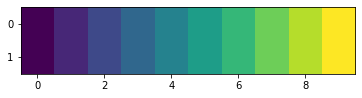

In [22]:
plt.imshow(matrix)

**6.Multiply the resulting matrix from Q5 with the matrix of a picture of your choice. Plot the resulting matrix.**

In [23]:
import matplotlib.image as mpimg

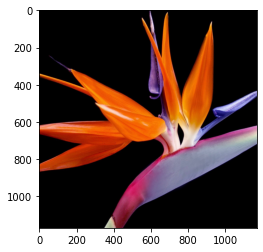

In [24]:
img = mpimg.imread("imgs/sterlizia.jpeg", 0)
plt.imshow(img)

In [25]:
img.shape

(1170, 1170, 3)

In [26]:
img2 = img.reshape((img.shape[0] * img.shape[1]), 3 )
img2

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [27]:
matrix = np.concatenate((incr_arr(3), incr_arr(3), incr_arr(3)))
matrix.shape

(3, 3)

In [28]:
img_f = np.matmul(img2, matrix)
img_f

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

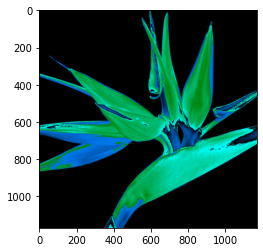

In [29]:
plt.imshow(img_f.reshape(img.shape).astype(img.dtype))

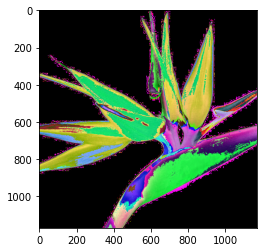

In [64]:
matrix = np.random.randn(3,3)
img_f2 = np.dot(img2, matrix)
plt.imshow(img_f2.reshape(img.shape).astype(img.dtype))

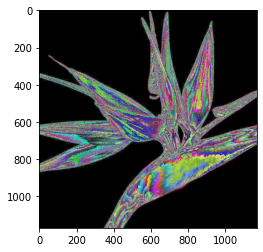

In [59]:
matrix = np.array([[1, 7, 3],[3, 1, 7],[7, 1, 3]])
img_f3 = np.dot(img2, matrix)
plt.imshow(img_f3.reshape(img.shape).astype(img.dtype))

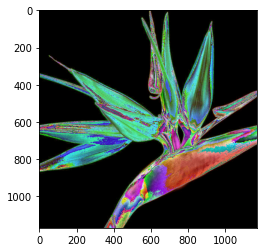

In [63]:
matrix = np.array([[0.23, 4, 0.11],[0.11, 0.23, 4],[4, 0.23, 0.11]])
img_f4 = np.dot(img2, matrix)
plt.imshow(img_f4.reshape(img.shape).astype(img.dtype))

# ***BONUS***

**Filters. Image editing / processing is done by changing
the values of the matrix (pixel by pixel). In this
section you will code FOUR (non-grayscale) commonly used
image filters. You can use libraries and approaches of
your choice.
Filters to choose from: • Amaro • Mayfair • Rise
• Hudson • Valencia • X-Pro II • Nashville • Lo-Fi • Sierra • Earlybird • Sutro • Toaster**